# Proje
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numara(ları)nızdan oluşan (proje, 1 ve/veya 2 kişi yapılabilir) nihai Jupyter Notebook (.ipynb) dosyasını, __17.06.2022 Cuma saat 23:59'a kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Projeyi 2 kişilik grup olarak yapacak olanların oluşturdukları grup bilgisini, __06.06.2022 Pazartesi, Saat 23:59’a kadar__ https://forms.gle/6tTULTGufVGWpqEk7 adresindeki forma girmeleri gerekmektedir.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# A. Pandas ile Veri Analizi (55 puan)
---

**Açıklama:**
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.

## Soru A.1 (10p):
* Kanser hastalarının klinik durumlarına ilişkin veriler içeren "clinical.tsv" dosyasını, ```cancer``` adlı DataFrame'e okuyunuz. ("'--" değerlerinin ```NaN``` olacak şekilde okunmasını sağlayınız.) 
* Tüm değerleri ```NaN``` olan sütunları siliniz.
* 'case_submitter_id', 'age_at_index', 'days_to_death', 'gender', 'race', 'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'ajcc_pathologic_stage', 'icd_10_code', 'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 'site_of_resection_or_biopsy', 'synchronous_malignancy', 'tissue_or_organ_of_origin', 'year_of_diagnosis', 'treatment_type' sütunları haricindeki sütunları siliniz.
* Sütunlarından herhangi birisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* Sütunlarından herhangi birisinde "not reported" ya da "Not Reported" değerleri olan satırları siliniz.
* Hasta barkodu (case_submitter_id) aynı olan satırlardan ilki kalacak şekilde tekrar edenleri siliniz.
* Hasta barkodu (case_submitter_id) sütununu DataFrame'in index'i yapınız.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırınız.

In [14]:
"""
We are reading the "--" as 'NaN' value
and droping the columns with NaN values with dropna function
in pandas
"""
cancer = pd.read_csv("clinical.tsv", sep='\t', na_values='\'--')
cancer = cancer.dropna(axis=1, how="all")
cancer.drop(cancer.columns.difference(['case_submitter_id', 'age_at_index', 'days_to_death', 'gender', 
                                       'race', 'vital_status', 'year_of_birth', 'year_of_death', 
                                       'age_at_diagnosis', 'ajcc_pathologic_stage', 'icd_10_code', 
                                       'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 
                                       'site_of_resection_or_biopsy', 'synchronous_malignancy', 
                                       'tissue_or_organ_of_origin', 'year_of_diagnosis', 'treatment_type']),
                                        axis=1,
                                        inplace=True)
#CAUTION SILINEN ROW SAYISI COK FAZLA?
index_count = cancer.shape[0]
cancer.dropna(inplace=True)
print("Deleted row count: {0: 1d}".format(index_count - cancer.shape[0]))
cancer['synchronous_malignancy'].value_counts()
#cancer.isin(['not reported', 'Not Reported'])
#df = df[df['Column Name'].isin(['Value']) == False]
#cancer.isin(['not reported', 'Not Reported'])
#cancer.drop(cancer.isin(['not reported', 'Not Reported']) == True, axis=0)
key=['not reported','Not Reported']

# OKTAYDAN ALDIK
notReportedIndexes=cancer[(cancer.loc[:].isin(key)).any(axis=1)].index #get all the rows that contain any key innit
cancer.drop(notReportedIndexes,axis=0,inplace=True)#drop all the rows at the indexes
cancer.drop_duplicates(subset ="case_submitter_id",keep = "first", inplace = True)
cancer.set_index('case_submitter_id', inplace=True)
print("DataFrame Status \nRow Count:{0: 1d}\nColumn Count:{1: 1d}".format(cancer.shape[0], 
                                                                          cancer.shape[1]))
print(cancer.columns)

Deleted row count:  16402
DataFrame Status 
Row Count: 1027
Column Count: 18
Index(['age_at_index', 'days_to_death', 'gender', 'race', 'vital_status',
       'year_of_birth', 'year_of_death', 'age_at_diagnosis',
       'ajcc_pathologic_stage', 'icd_10_code', 'primary_diagnosis',
       'prior_malignancy', 'prior_treatment', 'site_of_resection_or_biopsy',
       'synchronous_malignancy', 'tissue_or_organ_of_origin',
       'year_of_diagnosis', 'treatment_type'],
      dtype='object')


## Soru A.2 (10p):


* En az 10 hasta içeren birincil tanı (primary_diagnosis) kanser türlerinin cinsiyete göre dağılımını, yatay yığılmış (stacked) sütun grafik olarak gösteriniz.

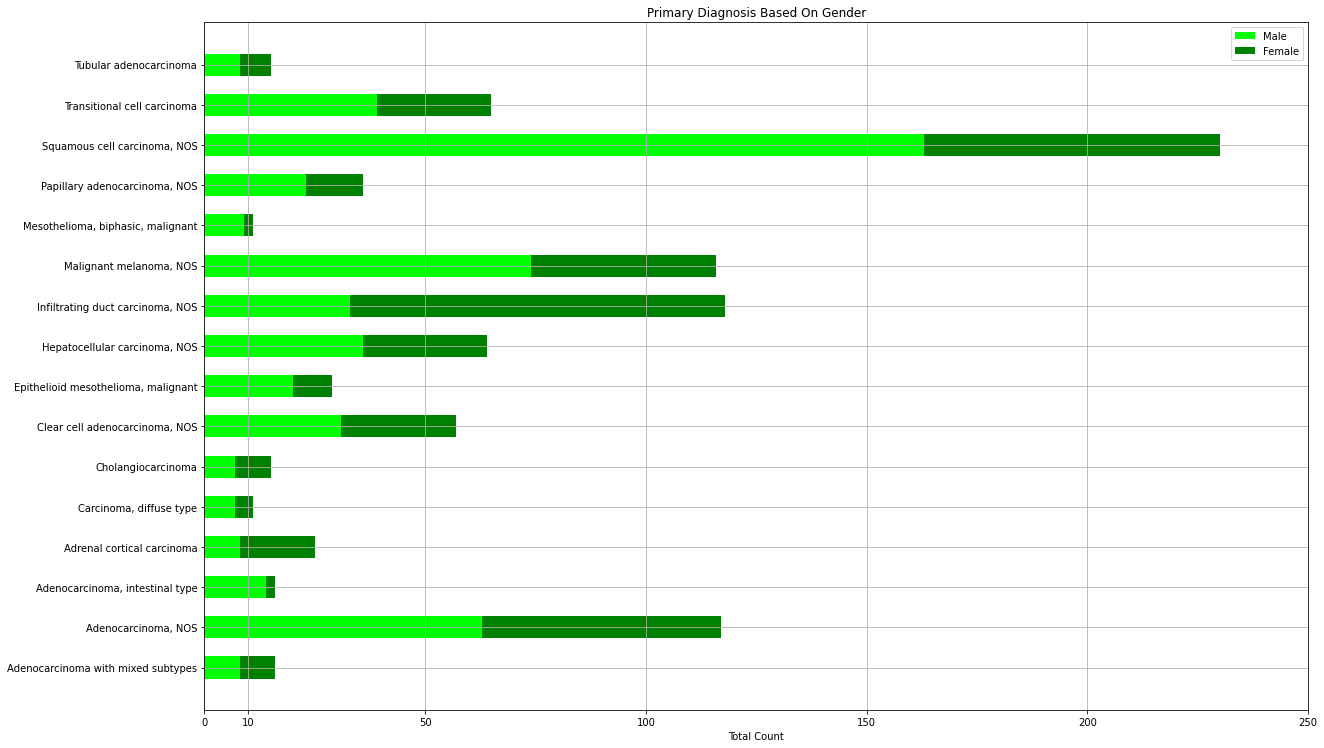

In [3]:
primary_diagnosis = pd.DataFrame(cancer.groupby(['primary_diagnosis',
                                                 'gender'])['gender'].count().unstack(fill_value=0))
primary_diagnosis = primary_diagnosis[primary_diagnosis['female'] + 
                                      primary_diagnosis['male'] > 10]


diseaes_list, female_list, male_list = primary_diagnosis.index , primary_diagnosis['female'] ,  primary_diagnosis['male']

fig, ax = plt.subplots()
ax.barh(diseaes_list, male_list, align='center', height=.55, color='#00ff00',label='Male')
ax.barh(diseaes_list, female_list, align='center', height=.55, left=male_list, color='g',label='Female')
ax.set_xlabel('Total Count')
ax.set_title('Primary Diagnosis Based On Gender')
ax.grid(True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(list(plt.xticks()[0]) + [10])
ax.legend()
plt.tight_layout()
plt.show()



## Soru A.3 (14p):
* Her bir kanser türünden (primary_diagnosis) kaç hasta olduğunu, büyükten küçüğe doğru sıra olarak yazdırınız.
* Tüm hastaların ve en çok görülen kanser türüne sahip olan hastaların yaş (age_at_index) dağılımlarını, aynı figürde yan yana iki histogram grafiği (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

Sorted in Descending order...

primary_diagnosis
Squamous cell carcinoma, NOS                                 230
Infiltrating duct carcinoma, NOS                             118
Adenocarcinoma, NOS                                          117
Malignant melanoma, NOS                                      116
Transitional cell carcinoma                                   65
Hepatocellular carcinoma, NOS                                 64
Clear cell adenocarcinoma, NOS                                57
Papillary adenocarcinoma, NOS                                 36
Epithelioid mesothelioma, malignant                           29
Adrenal cortical carcinoma                                    25
Adenocarcinoma with mixed subtypes                            16
Adenocarcinoma, intestinal type                               16
Tubular adenocarcinoma                                        15
Cholangiocarcinoma                                            15
Mesothelioma, biphasic, malignant        

<AxesSubplot:title={'center':'Histogram chart of all cancers in the dataset by age'}, xlabel='Age', ylabel='Count'>

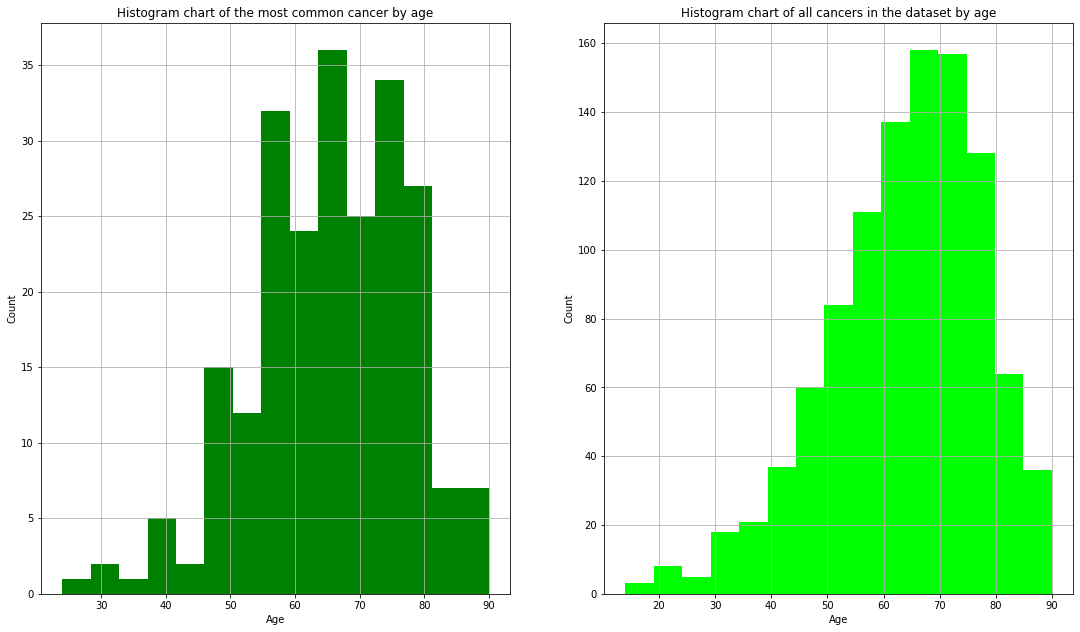

In [4]:
primary_diagnosis = cancer.groupby('primary_diagnosis')
print("Sorted in Descending order...\n")
print(primary_diagnosis.size().sort_values(ascending=False))
biggest_value = "Squamous cell carcinoma, NOS"
sbg_cancer = cancer.query("primary_diagnosis == @biggest_value")
sbg_plot = sbg_cancer['age_at_index']
all_plot = cancer['age_at_index']
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5, forward=True)
axes[0].set_xlabel("Age")
axes[1].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[1].set_ylabel("Count")
sbg_plot.hist(bins=15, ax=axes[0], color="green")
axes[0].set_title("Histogram chart of the most common cancer by age")
axes[1].set_title("Histogram chart of all cancers in the dataset by age")
all_plot.hist(bins=15,ax=axes[1], color="#00ff00")




## Soru A.4 (5p):
Yaşam süresi (days_to_death) ortalaması en yüksek olan kanser türünü (primary_diagnosis) yazdırınız.

In [5]:
death_rate_by_mean = cancer.groupby('primary_diagnosis')['days_to_death'].mean().sort_values(ascending=False)
print("The type of cancer with the longest life expectancy: {0},{1: .2f}".format(death_rate_by_mean.index[0],death_rate_by_mean[0]))


The type of cancer with the longest life expectancy: Amelanotic melanoma, 5237.00


## Soru A.5 (2p):
* Kanserin teşhis yaşı (age_at_diagnosis) ile hastanın kalan ömrü (days_to_death) arasındaki ilişkiyi gösteren bir saçılım grafiği çiziniz.

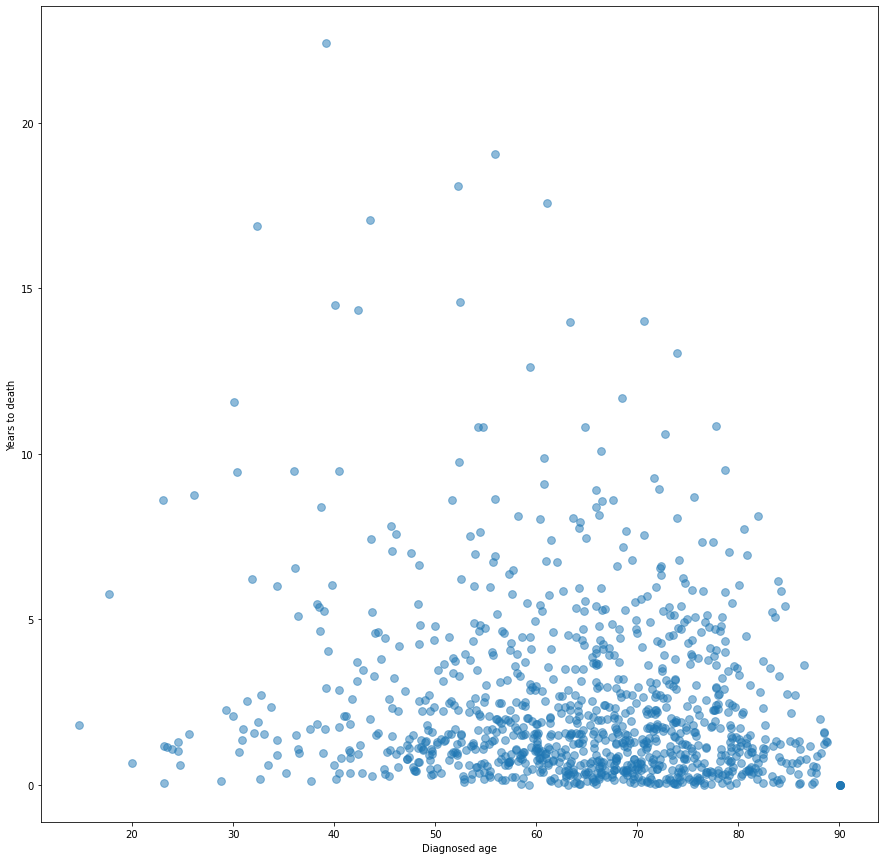

In [6]:
x = cancer['age_at_diagnosis']/365
y = cancer['days_to_death']/365
fig = plt.subplots(figsize = (15, 15))
plt.xlabel('Diagnosed age')
plt.ylabel('Years to death')
plt.scatter(x, y, alpha=0.5, s=60)
plt.show()

## Soru A.6 (7p):
* Kanser hastalarının alkol ve sigara kullanımlarına ilişkin veriler içeren "exposure.tsv" dosyasını, 'case_submitter_id' sütunu index olacak şekilde ```exposure``` adlı DataFrame'e okuyunuz. ("'--" ve "Not Reported" değerlerinin ```NaN``` olacak şekilde okunmasını sağlayınız.)
* Tüm değerleri ```NaN``` olan sütunları siliniz.
* Sütunlarından herhangi birisinde ```NaN``` değeri olan satırları siliniz.
* Oluşan DataFrame'in satır ve sütun sayısını yazdırınız.
* 'cancer' ve 'exposure' adlı DataFrame'lerde ortak olan hastaların verilerini, hasta barkodu (case_submitter_id) aracılığıyla birleştiriniz ve 'cancer_exposure' adlı yeni bir dataframe'e aktarınız.

In [13]:
exposure = pd.read_csv("exposure.tsv", 
                     sep='\t', 
                     na_values=['\'--', 'not reported', 'Not Reported'],
                     index_col='case_submitter_id')
exposure.dropna(axis=1,inplace=True, how='all')
exposure.dropna(axis=0,inplace=True)
print("Exposure DataFrame row and column count: {0:1d}, {1:1d}".format(exposure.shape[0], exposure.shape[1]))
#exposure['case_id'].value_counts()
#inner join
cancer_exposure = pd.merge(cancer, exposure, left_index=True, right_index=True)
cancer_exposure.head()

Exposure DataFrame row and column count: 136, 6


,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,...,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-7097,53.0,385.0,male,white,Dead,1949.0,2003.0,19382.0,Stage II,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",2002.0,"Radiation Therapy, NOS",9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849,64.0,32.0
TCGA-CV-6961,61.0,76.0,male,white,Dead,1938.0,1999.0,22532.0,Stage II,C02.9,...,No,"Tongue, NOS",1999.0,"Radiation Therapy, NOS",4075717b-2240-4842-a00a-0c4dbcb910c4,TCGA-HNSC,Yes,3.616438,66.0,33.0
TCGA-CV-A45Y,61.0,2703.0,male,american indian or alaska native,Dead,1939.0,2007.0,22442.0,Stage IVA,C32.9,...,No,"Larynx, NOS",2000.0,"Radiation Therapy, NOS",468061c2-0acb-4f67-a357-99ccbd81a8b7,TCGA-HNSC,Yes,2.136986,39.0,39.0
TCGA-CV-7568,48.0,927.0,female,white,Dead,1947.0,1997.0,17670.0,Stage IVA,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",1995.0,"Pharmaceutical Therapy, NOS",fa2d4258-3ee4-4d53-8ef2-9700b5cf38d6,TCGA-HNSC,No,1.917808,35.0,35.0
TCGA-CQ-5325,65.0,654.0,male,white,Dead,1942.0,2008.0,23833.0,Stage I,C02.9,...,No,"Tongue, NOS",2007.0,"Radiation Therapy, NOS",408c5d54-7888-4955-8386-bf8819b48a6c,TCGA-HNSC,Yes,2.684932,49.0,49.0


## Soru A.7 (7p):

Alkol geçmişi olan ve günde 3'ten fazla sigara içen hastalarda, kanserin ilk ortaya çıktığı doku veya organların yüzdelerini pasta grafiği üzerinde gösteriniz.

# B.  Scikit-learn ile Makine Öğrenmesi (55 puan)
---

**Açıklamalar:**
* Bu bölümde A.1 sorusunda elde edilen DataFrame ('cancer') kullanılacaktır. 
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları 'one-hot encoding' yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  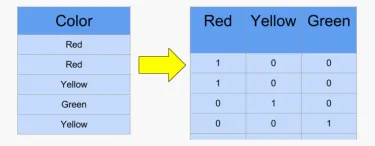
  3. Kategorik olmayan sütunlarda normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise 'k-fold cross-validation' ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hiper-parametre aramasını (hyper-parameter tunning) 'k-fold cross-validation' ile yapınız (GridSearchCV modülünü kullanabilirsiniz) ve test verisi üzerinde probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

## Soru B.1: Bir hastanın kaç gün ömrü kaldığının (days_to_death) tahminlenmesi (25p)

## Soru B.2: Bir hastaya uygulanan tedavi yönteminin (treatment_type) tahminlenmesi (30p)